In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# 왕좌의 게임 데이터 분석 (+ 시각화)

## 1. Matplotlib 소개
### - 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지
### - Matplotlib는 다음과 같은 정형화된 차트나 플롯 이외에도 저수준 api를 사용한 다양한 시각화 기능 제공
#### * 라인 플롯(line plot)
#### * 스캐터 플롯(scatter plot)
#### * 컨투어 플롯(contour plot)
#### * 서피스 플롯(surface plot)
#### * 바 차트(bar chart)
#### * 히스토그램(histogram)
#### * 박스 플롯(box plot)

## [Matplotlib 갤러리 웹사이트]
http://matplotlib.org/gallery.html

In [13]:
인구통계 = {'서울': [1053.5, 1023, 987],
        '경기':[1023, 1067, 1123],
        '충청':[512,489,487],
        '경상':[897, 872, 811],
        '전라':[451, 421, 399]
      }
df = DataFrame(인구통계)
df.index = [2015, 2016, 2017]
df

,서울,경기,충청,경상,전라
2015,1053.5,1023,512,897,451
2016,1023.0,1067,489,872,421
2017,987.0,1123,487,811,399


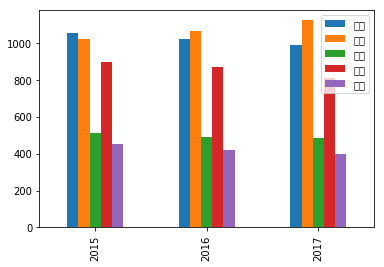

In [14]:
# 기본 그리기
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
df.plot(kind='bar')

NameError: name 'plt' is not defined

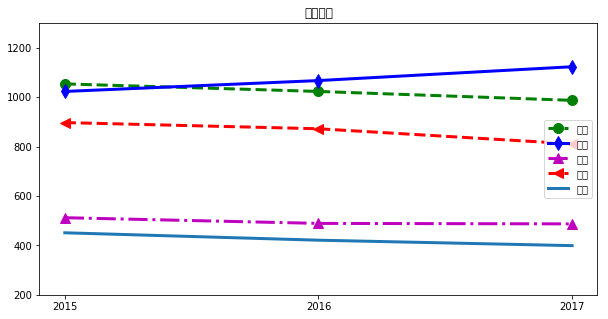

In [15]:
df.plot(
    kind = 'line', title = '인구추이',
    figsize=(10, 5),
    xticks = df.index,
    ylim = [200,1300],
    style = ['g--o', 'b-d','m-.^','r--<'],
    lw = 3,
    ms = 10)
plt.xlabel('년도')
plt.ylabel('인구수')

<img src="img/matplotlib인자.jpg" alt=" matplotlib" style="width: 1200px;"/>

#### 색상: https://matplotlib.org/examples/color/named_colors.html
#### 기타 스타일: https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

In [ ]:
# 실습. 아래 그림처럼 연도별 지역별 인구수 그래프 그리기
df.T.plot(kind='bar', subplots = True, figsize=(8,10))


<img src="img/그림의구조.jpg" alt="그림의구조" style="width: 1200px;"/>

# matplotlib 기반 최신 시각화 라이브러리 소개
1. seaborn
  - matplotlib을 기반으로 만들어진 시각화 라이브러리
  - 디자인적으로 훨씬 세련됨.  
  - matplotlib와 사용방식이 유사하므로 쉽고 빠르게 습득할 수 있음.
  - https://seaborn.pydata.org/

2. bokeh
  - 웹브라우저 상에서의 시각화에 효과적인 파이썬 인터랙티브 시각화 라이브러리
  - 플롯을 html 파일로 export하여 이를 웹브라우저를 통해 확인할 수 있음.
  - matplotlib와 비슷, jupyter와 호환이 잘 됨. 
  - https://bokeh.pydata.org/en/latest/

3. Folium 
  - 지리적 데이터 시각화에 특화된 라이브러리 (leaflet.js 기반)
  - 웹브라우저에서 확인 가능
  - 지도 데이터 사용을 위해 선행되어야 하는 작업이 원래 매우 많은데, 이러한 선행작업을 간단화함.
  - https://github.com/python-visualization/folium
  - http://python-visualization.github.io/folium/docs-v0.5.0/
  - http://pinkwink.kr/971

## 2. 왕좌의 게임 데이터 분석 및 시각화 실습
### 1) 데이터 적재

In [4]:
battles = pd.read_csv('data/data-society-game-of-thrones/battles.csv')
death = pd.read_csv('data/data-society-game-of-thrones/character-deaths.csv')

### 2) 책의 권별로 사망자 수 추이 시각화

In [ ]:
death_count_book_chapter = death.pivot_table(index = 'Book of Death', values = 'Name', aggfunc='count')


In [ ]:
graph1 = death_count_book_chapter.plot(style = 'k--o')
# ==(color= 'k', linestyle= '--', marker = 'o')

In [ ]:
graph1.set_title('권별 사망자수')
graph1.set_xticks([1,2,3,4,5])
graph1.set_xlabel('book chapter')
graph1.set_ylabel('# of Death')


In [ ]:
graph1.figure

In [ ]:
# figure : 도화지
graph1.figure.savefig('book_chapter.jpg')

### 3) 대규모 전쟁의  공격진영과 수비 진영의 숫자 시각화
#### 대규모 전쟁 = 공격과 수비 모두 합쳐서 10,000명 이상 참가한 전쟁

In [ ]:
big_battles = battles[battles['attacker_size']+battles['defender_size']>=10000]

In [ ]:
big_battles = big_battles[['name','attacker_size','defender_size']]

In [ ]:
big_battles.plot(kind = 'barh', stacked = True, figsize = (8,8))

In [ ]:
big_battles = big_battles.set_index('name')

In [ ]:
big_battles.T.plot(kind= 'pie', subplots = True, layout = (5,2), figsize = (8,15))

### 4) (실습) 가문 별로 전쟁을 벌인 횟수 시각화

In [24]:
#컬럼별 이름 출력
battles.columns
# house_col = attacker_1~defender4
house_col = battles.columns[5:13]

In [25]:
가문별전쟁참가횟수= Series()

In [26]:
for col in house_col: # ['attacker_1', 'attacker_2', ... 'defender_4']
    가문별전쟁참가횟수 = 가문별전쟁참가횟수.add(battles[col].value_counts, fill_value = 0)
가문별전쟁참가횟수

Series([], dtype: object)

In [22]:
# sorting 시 한개의 열을 갖고 잇는 시리즈라서 by 인자 필요없음
가문별전쟁참가횟수.sort_values(ascending = False).head(5).plot(kind='bar')

TypeError: Empty 'DataFrame': no numeric data to plot

In [10]:
battles.attacker_1.value_counts()

Stark                          8
Lannister                      8
Greyjoy                        7
Baratheon                      6
Frey                           2
Bolton                         2
Brave Companions               1
Darry                          1
Brotherhood without Banners    1
Bracken                        1
Free folk                      1
Name: attacker_1, dtype: int64

In [11]:
battles.attacker_2.value_counts()

Tully        3
Karstark     2
Frey         1
Lannister    1
Thenns       1
Greyjoy      1
Bolton       1
Name: attacker_2, dtype: int64

In [12]:
battles.attacker_3.value_counts()

Mormont    2
Giants     1
Name: attacker_3, dtype: int64

In [28]:
# attacker_1~4, defender_1~4의 가문들 뽑기
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [6]:
battles['attacker_1'].dropna()

 

0                       Lannister
1                       Lannister
2                       Lannister
3                           Stark
4                           Stark
5                           Stark
6                       Lannister
7                         Greyjoy
8                         Greyjoy
9                         Greyjoy
10                          Stark
11                        Greyjoy
12                        Greyjoy
13                         Bolton
14                          Stark
15                      Baratheon
16                      Lannister
17                          Stark
18                          Stark
19                      Baratheon
20                          Darry
21                          Stark
22    Brotherhood without Banners
23                      Lannister
24                      Lannister
25                           Frey
26                           Frey
27                      Free folk
28                         Bolton
29            

In [29]:
battles['attacker_1']+battles['attacker_2']+battles['attacker_3']+battles['attacker_4']+battles['defender_1']+battles['defender_2']+battles['defender_3']+battles['defender_4']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
dtype: object

In [43]:
 battles['가문'] = battles.attacker_1.astype(str).str.cat([battles.attacker_2.astype(str),battles.attacker_3.astype(str),battles.attacker_4.astype(str),battles.defender_1.astype(str),battles.defender_2.astype(str),battles.defender_3.astype(str),battles.defender_4.astype(str)], sep=',')
battles.가문

0               Lannister,nan,nan,nan,Tully,nan,nan,nan
1           Lannister,nan,nan,nan,Baratheon,nan,nan,nan
2               Lannister,nan,nan,nan,Tully,nan,nan,nan
3               Stark,nan,nan,nan,Lannister,nan,nan,nan
4             Stark,Tully,nan,nan,Lannister,nan,nan,nan
5             Stark,Tully,nan,nan,Lannister,nan,nan,nan
6               Lannister,nan,nan,nan,Darry,nan,nan,nan
7                 Greyjoy,nan,nan,nan,Stark,nan,nan,nan
8                 Greyjoy,nan,nan,nan,Stark,nan,nan,nan
9                 Greyjoy,nan,nan,nan,Stark,nan,nan,nan
10                Stark,nan,nan,nan,Greyjoy,nan,nan,nan
11                Greyjoy,nan,nan,nan,Stark,nan,nan,nan
12                Greyjoy,nan,nan,nan,Stark,nan,nan,nan
13             Bolton,Greyjoy,nan,nan,Stark,nan,nan,nan
14            Stark,Tully,nan,nan,Lannister,nan,nan,nan
15          Baratheon,nan,nan,nan,Baratheon,nan,nan,nan
16              Lannister,nan,nan,nan,Tully,nan,nan,nan
17              Stark,nan,nan,nan,Lannister,nan,

In [47]:
가문별전쟁 = battles.가문.replace(",nan", "")
가문별전쟁

0               Lannister,nan,nan,nan,Tully,nan,nan,nan
1           Lannister,nan,nan,nan,Baratheon,nan,nan,nan
2               Lannister,nan,nan,nan,Tully,nan,nan,nan
3               Stark,nan,nan,nan,Lannister,nan,nan,nan
4             Stark,Tully,nan,nan,Lannister,nan,nan,nan
5             Stark,Tully,nan,nan,Lannister,nan,nan,nan
6               Lannister,nan,nan,nan,Darry,nan,nan,nan
7                 Greyjoy,nan,nan,nan,Stark,nan,nan,nan
8                 Greyjoy,nan,nan,nan,Stark,nan,nan,nan
9                 Greyjoy,nan,nan,nan,Stark,nan,nan,nan
10                Stark,nan,nan,nan,Greyjoy,nan,nan,nan
11                Greyjoy,nan,nan,nan,Stark,nan,nan,nan
12                Greyjoy,nan,nan,nan,Stark,nan,nan,nan
13             Bolton,Greyjoy,nan,nan,Stark,nan,nan,nan
14            Stark,Tully,nan,nan,Lannister,nan,nan,nan
15          Baratheon,nan,nan,nan,Baratheon,nan,nan,nan
16              Lannister,nan,nan,nan,Tully,nan,nan,nan
17              Stark,nan,nan,nan,Lannister,nan,

### 5) (실습) 년도별로 사망자의 숫자와 전쟁이 벌어진 횟수 시각화

In [29]:
battle_count = battles.pivot_table(index='year', values='name', aggfunc = 'count')

In [27]:
death_count = death.pivot_table(index = 'Death Year', values = 'Name', aggfunc = 'count')

In [30]:
battle_death_count = pd.concat([battle_count, death_count], axis = 1)
battle_death_count.columns = ['# of Battles','']

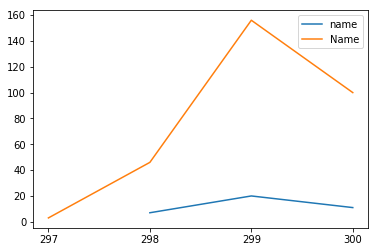

In [32]:
battle_death_count.plot(xticks = battle_death_count.index)